In [1]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Gabriel\Anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.2                |           py37_0         2.8 MB
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0

The following packages will be UPDATED:

  conda                                       4.7.10-py37_0 --> 4.8.2-py37_0




missingno-0.4.1      | 10 KB     |            |   0% 
missingno-0.4.1      | 10 KB     | ########## | 100% 

conda-4.8.2          | 2.8 MB    |            |   0% 
conda-4.8

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
%matplotlib inline

In [3]:
path = 'delitos_001.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()


,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001280,Presuntos delitos registrados como abuso de co...,NaN,931,909,1086,849,362,Delitos
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001281,Presuntos delitos registrados como abuso sexua...,NaN,1507,1457,1505,1084,1208,Delitos
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001283,Presuntos delitos registrados como amenazas en...,NaN,3191,3476,4178,3102,1659,Delitos
4,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001284,Presuntos delitos registrados como corrupci¢n ...,NaN,100,82,331,595,37,Delitos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170076 entries, 0 to 170075
Data columns (total 13 columns):
entidad           170076 non-null int64
desc_entidad      170076 non-null object
municipio         170076 non-null int64
desc_municipio    170076 non-null object
id_indicador      170076 non-null int64
indicador         170076 non-null object
2010              126 non-null float64
2011              2436 non-null object
2012              128616 non-null object
2013              55193 non-null object
2014              57368 non-null object
2015              33238 non-null object
unidad_medida     170076 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 16.9+ MB


In [5]:
df.shape


(170076, 13)

In [6]:
df.shape[0]

170076

In [7]:
df.columns.values.tolist()

['entidad',
 'desc_entidad',
 'municipio',
 'desc_municipio',
 'id_indicador',
 'indicador',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 'unidad_medida']

In [8]:
df.dtypes

entidad             int64
desc_entidad       object
municipio           int64
desc_municipio     object
id_indicador        int64
indicador          object
2010              float64
2011               object
2012               object
2013               object
2014               object
2015               object
unidad_medida      object
dtype: object

In [9]:
df.isnull().any().any()

True

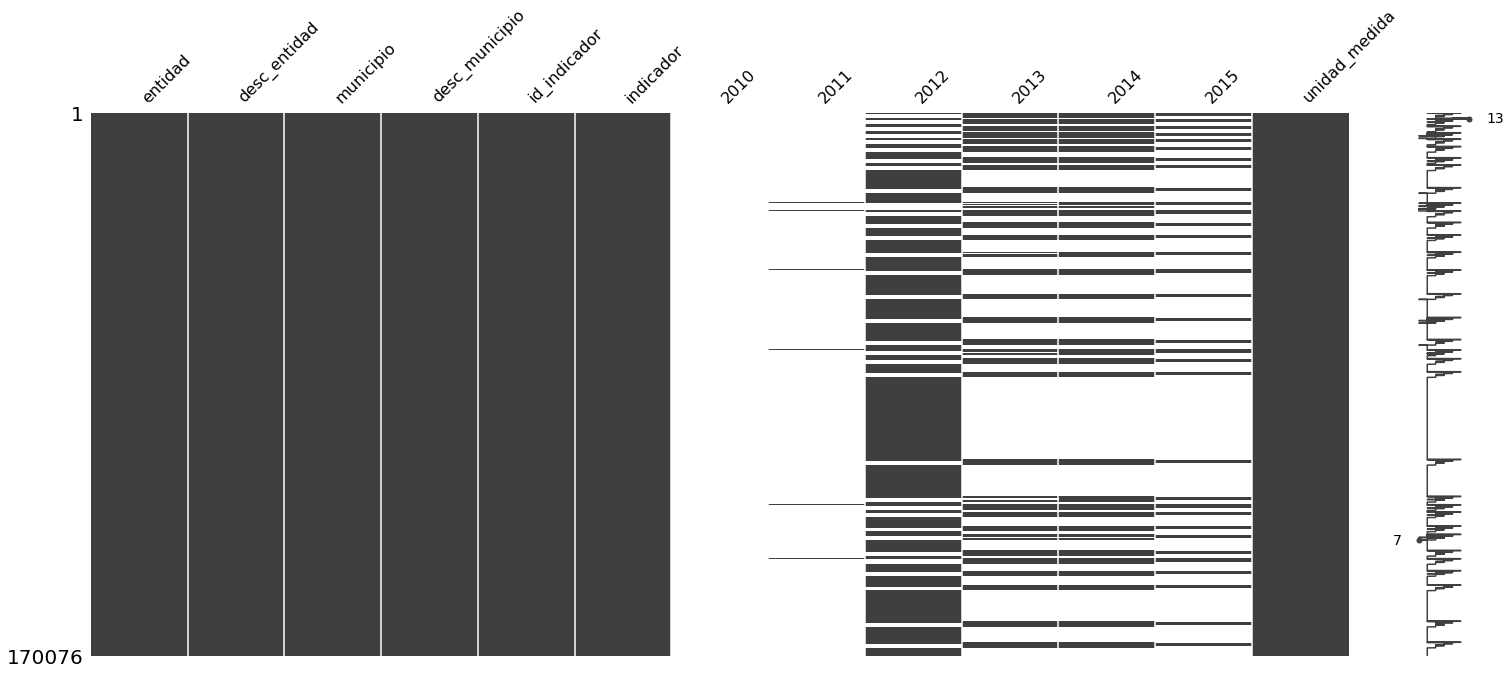

In [10]:
msno.matrix(df)

In [11]:
df.replace({' ': np.nan}, inplace=True)

In [12]:
df.isnull().any().any()

True

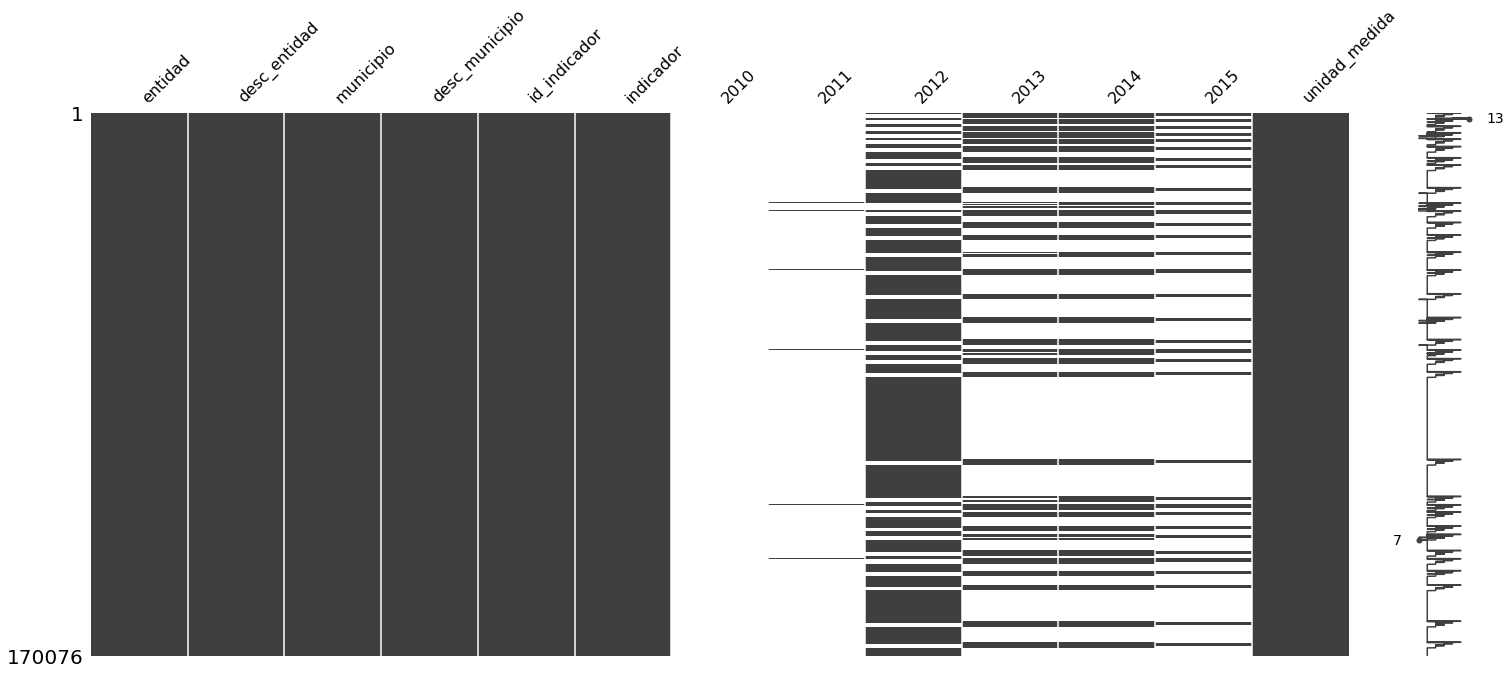

In [13]:
msno.matrix(df)

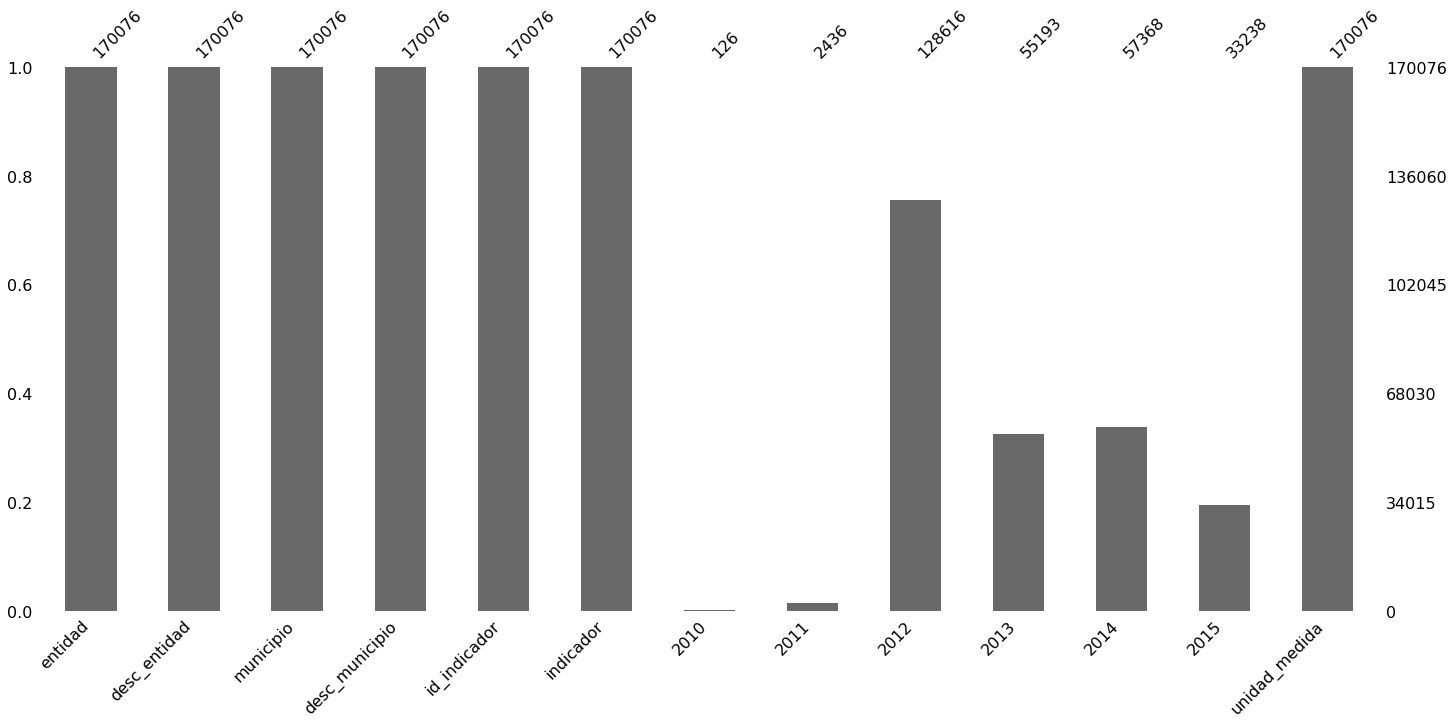

In [14]:
msno.bar(df)

In [15]:
df.columns[df.isnull().any()].tolist()

['2010', '2011', '2012', '2013', '2014', '2015']

In [16]:
df.describe()

,entidad,municipio,id_indicador,2010
count,170076.000000,170076.000000,1.700760e+05,126.000000
mean,18.105482,70.775594,6.200048e+09,5765.825397
std,8.330607,118.806555,2.816634e+05,25119.710455
min,0.000000,0.000000,6.200001e+09,0.000000
25%,12.000000,0.000000,6.200030e+09,12.750000
50%,20.000000,21.000000,6.200030e+09,164.500000
75%,24.000000,81.000000,6.200031e+09,1215.000000
max,32.000000,570.000000,6.204451e+09,230263.000000


In [19]:
df.loc[[2]]

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos


In [20]:
df.loc[30:33]

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
30,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001310,Presuntos delitos registrados como robo de maq...,NaN,48,2,5,1,14,Delitos
31,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001311,Presuntos delitos registrados como robo de veh...,NaN,27311,27740,19094,13034,17068,Delitos
32,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001312,Presuntos delitos registrados como robo en tra...,NaN,411,940,947,360,45,Delitos
33,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001313,Presuntos delitos registrados como robo en tra...,NaN,2631,3317,2398,607,1116,Delitos


In [21]:
df.drop([0,24,51], axis=0).head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001281,Presuntos delitos registrados como abuso sexua...,NaN,1507,1457,1505,1084,1208,Delitos
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001283,Presuntos delitos registrados como amenazas en...,NaN,3191,3476,4178,3102,1659,Delitos
4,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001284,Presuntos delitos registrados como corrupci¢n ...,NaN,100,82,331,595,37,Delitos
5,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001285,Presuntos delitos registrados como da¤o a la p...,NaN,14528,11957,34487,6727,6192,Delitos


In [22]:
df.head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
0,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001280,Presuntos delitos registrados como abuso de co...,NaN,931,909,1086,849,362,Delitos
1,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001281,Presuntos delitos registrados como abuso sexua...,NaN,1507,1457,1505,1084,1208,Delitos
2,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos
3,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001283,Presuntos delitos registrados como amenazas en...,NaN,3191,3476,4178,3102,1659,Delitos
4,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001284,Presuntos delitos registrados como corrupci¢n ...,NaN,100,82,331,595,37,Delitos


In [23]:
df.agg(['count', 'size', 'nunique'])

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
count,170076,170076,170076,170076,170076,170076,126,2436,128616,55193,57368,33238,170076
size,170076,170076,170076,170076,170076,170076,170076,170076,170076,170076,170076,170076,170076
nunique,33,33,571,2320,1944,1944,100,451,2267,2180,2153,1810,4


In [25]:
df.groupby('2015').agg(['count', 'size', 'nunique']).stack()

entidad  desc_entidad  municipio  desc_municipio  id_indicador  \
2015                                                                           
-    count       2518          2518       2518            2518          2518   
     size        2518          2518       2518            2518          2518   
     nunique       20            20          1               1           817   
0    count      20999         20999      20999           20999         20999   
     size       20999         20999      20999           20999         20999   
     nunique       33            33          1               2           964   
1    count       1286          1286       1286            1286          1286   
     size        1286          1286       1286            1286          1286   
     nunique       33            33          1               2           553   
10   count        142           142        142             142           142   
     size         142           142        142             142           142   
     nunique       31            31          1               2           122   
100  count         13            13         13              13            13   
     size          13            13         13              13            13   
     nunique        9             9          1               2            12   
1005 count          1             1          1               1             1   
     size           1             1          1               1             1   
     nunique        1             1          1               1             1   
1007 count          2             2          2               2             2   
     size           2             2          2               2             2   
     nunique        2             2          1               1             2   
1008 count          2             2          2               2             2   
     size           2             2          2               2             2   
     nunique        2             2          1               1             2   
101  count          6             6          6               6             6   
     size           6             6          6               6             6   
     nunique        6             6          1               1             6   
1010 count          2             2          2               2             2   
     size           2             2          2               2             2   
     nunique        2             2          1               1             2   
...               ...           ...        ...             ...           ...   
986  count          1             1          1               1             1   
     size           1             1          1               1             1   
     nunique        1             1          1               1             1   
9860 count          1             1          1               1             1   
     size           1             1          1               1             1   
     nunique        1             1          1               1             1   
988  count          3             3          3               3             3   
     size           3             3          3               3             3   
     nunique        2             2          1               1             3   
99   count         10            10         10              10            10   
     size          10            10         10              10            10   
     nunique        9             9          1               2            10   
990  count          1             1          1               1             1   
     size           1             1          1               1             1   
     nunique        1             1          1               1             1   
991  count          1             1          1               1             1   
     size           1             1          1               1             1   
     nunique  

In [26]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()


,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
57950,15,Mxico,0,Estatal,6200032776,Conductas antisociales en grado de tentativa r...,NaN,NaN,NaN,0,0,NaN,Conductas antisociales
91910,20,Oaxaca,202,San Juan Lachao,6200030143,Presuntos delitos registrados como corrupci¢n ...,NaN,NaN,0,NaN,NaN,NaN,Delitos
104157,20,Oaxaca,474,Santiago Llano Grande,6200030156,Presuntos delitos registrados como otros delit...,NaN,NaN,0,NaN,NaN,NaN,Delitos
126361,24,San Luis Potos¡,0,Estatal,6200032931,Delitos en grado de tentativa registrados en l...,NaN,NaN,NaN,-,0,NaN,Delitos
87200,20,Oaxaca,98,San Andrs Teotil lpam,6200030082,Presuntos delitos registrados como fraude en l...,NaN,NaN,0,NaN,NaN,NaN,Delitos


In [28]:
df_dropped = df.dropna(subset=['2010'])
df_dropped.head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
1764,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200033228,Delitos registrados en las causas penales en t...,287.0,282,395,12597,7705,67,Delitos
1765,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200033231,Delitos registrados en las causas penales ingr...,18.0,12,22,4,NaN,NaN,Delitos
1766,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200033232,Delitos registrados en las causas penales ingr...,1393.0,1496,1946,1843,1953,1301,Delitos
1767,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200033235,Delitos registrados en las causas penales resu...,99.0,88,31,41,47,67,Delitos
1768,0,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200033236,Delitos registrados en las causas penales resu...,823.0,780,1025,731,375,390,Delitos


In [29]:
list(df['entidad'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [30]:
df['entidad'].replace({0:"EU Mexicanos", 
                       1:"Aguascalientes",
                       2:"Baja California", 
                       3:"Baja California Sur", 
                       4:"Campeche", 
                       5:"Coahuila"}, inplace=True)

In [31]:
list(df['entidad'].unique())

['EU Mexicanos',
 'Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila',
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [33]:
keys = list(df['entidad'].unique())
vals = range(0,32)
act = dict(zip(keys, vals))
act


{'EU Mexicanos': 0,
 'Aguascalientes': 1,
 'Baja California': 2,
 'Baja California Sur': 3,
 'Campeche': 4,
 'Coahuila': 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31}

In [40]:
df_copy = df.copy()
df_copy.head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
0,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001280,Presuntos delitos registrados como abuso de co...,NaN,931,909,1086,849,362,Delitos
1,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001281,Presuntos delitos registrados como abuso sexua...,NaN,1507,1457,1505,1084,1208,Delitos
2,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos
3,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001283,Presuntos delitos registrados como amenazas en...,NaN,3191,3476,4178,3102,1659,Delitos
4,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001284,Presuntos delitos registrados como corrupci¢n ...,NaN,100,82,331,595,37,Delitos


In [42]:
df_copy['entidad_'] = df['entidad'].map(act)
df_copy.head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida,entidad_
0,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001280,Presuntos delitos registrados como abuso de co...,NaN,931,909,1086,849,362,Delitos,0.0
1,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001281,Presuntos delitos registrados como abuso sexua...,NaN,1507,1457,1505,1084,1208,Delitos,0.0
2,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos,0.0
3,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001283,Presuntos delitos registrados como amenazas en...,NaN,3191,3476,4178,3102,1659,Delitos,0.0
4,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001284,Presuntos delitos registrados como corrupci¢n ...,NaN,100,82,331,595,37,Delitos,0.0


In [43]:
list(df_copy['entidad'].unique())

['EU Mexicanos',
 'Aguascalientes',
 'Baja California',
 'Baja California Sur',
 'Campeche',
 'Coahuila',
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [47]:
df_copy.head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida,entidad_
0,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001280,Presuntos delitos registrados como abuso de co...,NaN,931,909,1086,849,362,Delitos,0.0
1,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001281,Presuntos delitos registrados como abuso sexua...,NaN,1507,1457,1505,1084,1208,Delitos,0.0
2,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001282,Presuntos delitos registrados como allanamient...,NaN,963,1187,1255,1379,1273,Delitos,0.0
3,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001283,Presuntos delitos registrados como amenazas en...,NaN,3191,3476,4178,3102,1659,Delitos,0.0
4,EU Mexicanos,Estados Unidos Mexicanos,0,Estados Unidos Mexicanos,6200001284,Presuntos delitos registrados como corrupci¢n ...,NaN,100,82,331,595,37,Delitos,0.0


In [49]:
df_copy.groupby(["2011", "2012", "2013", "2014"]).count()


entidad  desc_entidad  municipio  desc_municipio  \
2011  2012  2013  2014                                                      
-     0     0     -           10            10         10              10   
                  0           84            84         84              84   
                  1            2             2          2               2   
                  16           1             1          1               1   
                  2            1             1          1               1   
                  27           1             1          1               1   
                  320          1             1          1               1   
                  327          1             1          1               1   
                  4            1             1          1               1   
                  65           1             1          1               1   
            12    11           1             1          1               1   
            13    0            1             1          1               1   
            197   0            1             1          1               1   
            2     0            1             1          1               1   
            314   21           1             1          1               1   
            36    0            1             1          1               1   
            446   1292         1             1          1               1   
            5     0            1             1          1               1   
            6     1            1             1          1               1   
            64    3            1             1          1               1   
            74    55           1             1          1               1   
            78    235          1             1          1               1   
      1     0     0            4             4          4               4   
            120   11           1             1          1               1   
            145   110          1             1          1               1   
      10    0     0            1             1          1               1   
            2     0            1             1          1               1   
      12    2     0            1             1          1               1   
      123   0     0            1             1          1               1   
      13    0     3            1             1          1               1   
...                          ...           ...        ...             ...   
923   932   557   354          1             1          1               1   
93    113   71    106          1             1          1               1   
      15    100   449          1             1          1               1   
      302   276   276          1             1          1               1   
      567   207   240          1             1          1               1   
      66    26    259          1             1          1               1   
931   909   1086  849          1             1          1               1   
94    129   131   95           1             1          1               1   
941   996   1527  106          1             1          1               1   
945   1262  926   1095         1             1          1               1   
95    107   97    138          1             1          1               1   
      233   191   224          1             1          1               1   
      712   292   123          1             1          1               1   
96    0     0     12           1             1          1               1   
962   1015  686   904          1             1          1               1   
963   1187  1255  1379         1             1          1               1   
968   1695  2207  5083         1             1          1               1   
97    135   82    10           1             1          1               1   
      16    30    39           1             1          1               1   
      665   52    167

In [50]:
df_sample = df.sample(frac=0.05, random_state=1)
df_sample.head()

,entidad,desc_entidad,municipio,desc_municipio,id_indicador,indicador,2010,2011,2012,2013,2014,2015,unidad_medida
57950,15,Mxico,0,Estatal,6200032776,Conductas antisociales en grado de tentativa r...,NaN,NaN,NaN,0,0,NaN,Conductas antisociales
91910,20,Oaxaca,202,San Juan Lachao,6200030143,Presuntos delitos registrados como corrupci¢n ...,NaN,NaN,0,NaN,NaN,NaN,Delitos
104157,20,Oaxaca,474,Santiago Llano Grande,6200030156,Presuntos delitos registrados como otros delit...,NaN,NaN,0,NaN,NaN,NaN,Delitos
126361,24,San Luis Potos¡,0,Estatal,6200032931,Delitos en grado de tentativa registrados en l...,NaN,NaN,NaN,-,0,NaN,Delitos
87200,20,Oaxaca,98,San Andrs Teotil lpam,6200030082,Presuntos delitos registrados como fraude en l...,NaN,NaN,0,NaN,NaN,NaN,Delitos


In [52]:
df_dropped['2015'].dtype

dtype('O')

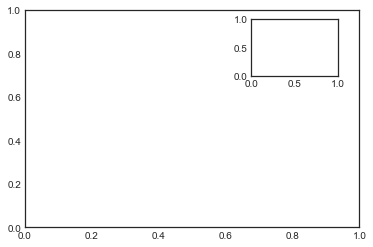

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

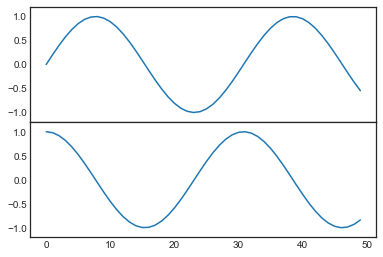

In [63]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

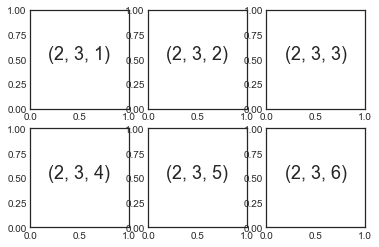

In [64]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

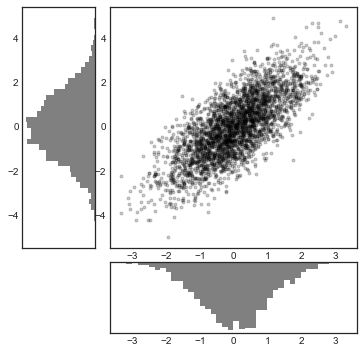

In [65]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

Text(0.5, 1.0, 'Frequency of municipio')

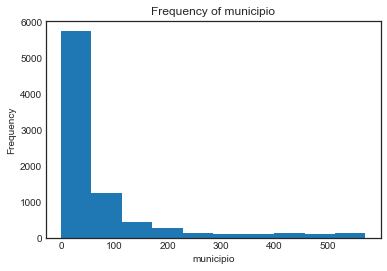

In [69]:
plt.hist(df_sample['municipio'])
plt.xlabel('municipio')
plt.ylabel('Frequency')
plt.title('Frequency of municipio')

Text(0.5, 1.0, 'Box Plot of municipios')

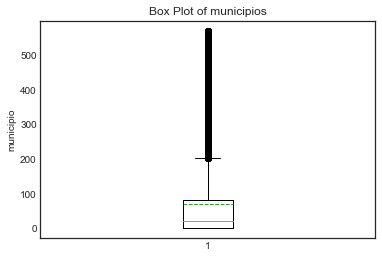

In [72]:
plt.boxplot(df_sample['municipio'], showmeans=True, meanline=True)
plt.ylabel('municipio')
plt.title('Box Plot of municipios')